In [1]:
# revenue_forecasting.py

import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import os


In [6]:

# --- Load Data ---
def load_data():
    df = pd.read_csv("hospitality-ai-platform/data/revenue_summary.csv", parse_dates=["date"])
    df['total_revenue'] = df['room_revenue'] + df['fnb_revenue']
    return df[['date', 'total_revenue']].rename(columns={"date": "ds", "total_revenue": "y"})


In [7]:
df=load_data()
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'hospitality-ai-platform/data/revenue_summary.csv'

In [44]:
# --- Train Model ---
def train_model(df):
    model = Prophet(
        yearly_seasonality=True,
        weekly_seasonality=True,
        daily_seasonality=False
    )
    model.fit(df)
    return model

In [45]:
model=train_model(df)

23:42:35 - cmdstanpy - INFO - Chain [1] start processing
23:42:35 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
# --- Forecast Future ---
def forecast_revenue(model, periods=90):
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

In [47]:
forecast=forecast_revenue(md)
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2022-01-01,21351.828844,16813.084213,25881.420943,21351.828844,21351.828844,-55.740841,-55.740841,-55.740841,-3.649296,-3.649296,-3.649296,-52.091545,-52.091545,-52.091545,0.0,0.0,0.0,21296.088003
1,2022-01-02,21351.262216,17120.651145,26276.767911,21351.262216,21351.262216,203.439176,203.439176,203.439176,174.539941,174.539941,174.539941,28.899235,28.899235,28.899235,0.0,0.0,0.0,21554.701392
2,2022-01-03,21350.695588,17090.413933,26561.321909,21350.695588,21350.695588,378.644293,378.644293,378.644293,261.693300,261.693300,261.693300,116.950993,116.950993,116.950993,0.0,0.0,0.0,21729.339881
3,2022-01-04,21350.128960,17223.307984,26240.954299,21350.128960,21350.128960,132.192004,132.192004,132.192004,-77.524550,-77.524550,-77.524550,209.716553,209.716553,209.716553,0.0,0.0,0.0,21482.320964
4,2022-01-05,21349.562333,17041.528929,26261.517318,21349.562333,21349.562333,54.093148,54.093148,54.093148,-250.562937,-250.562937,-250.562937,304.656085,304.656085,304.656085,0.0,0.0,0.0,21403.655481


In [48]:
# --- Plot Results ---
def plot_forecast(df, forecast):
    model.plot(forecast)
    plt.title("Revenue Forecast")
    plt.xlabel("Date")
    plt.ylabel("Total Revenue")
    plt.tight_layout()
    plt.savefig("outputs/revenue_forecast_plot.png")
    plt.show()



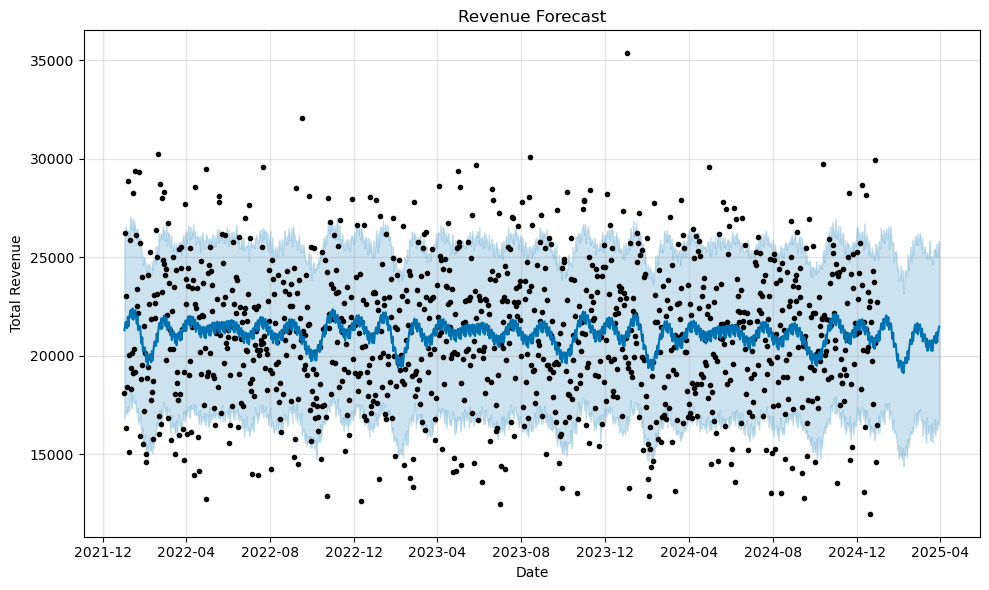

In [49]:
results=plot_forecast(df,forecast)

In [50]:
# --- Save Forecast to CSV ---
def save_forecast(forecast):
    forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_csv("outputs/revenue_forecast.csv", index=False)



In [51]:
# --- Run Pipeline ---
def main():
    os.makedirs("outputs", exist_ok=True)
    df = load_data()
    model = train_model(df)
    forecast = forecast_revenue(model)
    plot_forecast(df, forecast)
    save_forecast(forecast)
    print("✅ Forecast complete. Outputs saved to 'outputs/' folder.")



23:42:37 - cmdstanpy - INFO - Chain [1] start processing
23:42:37 - cmdstanpy - INFO - Chain [1] done processing


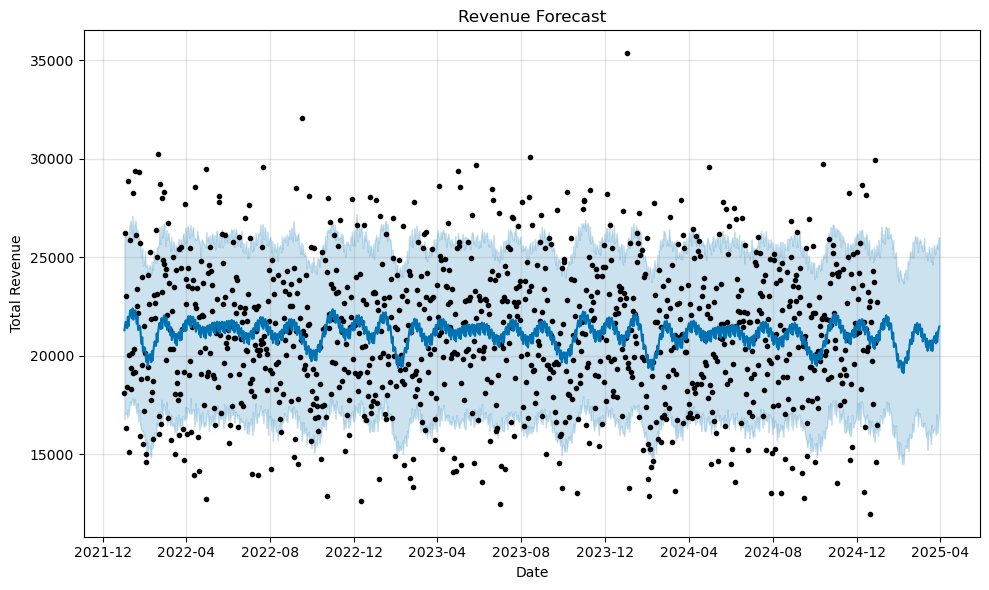

✅ Forecast complete. Outputs saved to 'outputs/' folder.


In [52]:
if __name__ == "__main__":
    main()